# INSH 2102 Mini-Project 1: Martha Ballard's Diary

### The Project

Because Martha Ballard recorded a diary entry nearly every day for 27 years, historians are able to use her entries to create a picture of what life could be like in New England at the turn of the 19th century. In this project, our group intends to focus on one part of that picture. **We will investigate how the quality of the weather relates to occurrences of illness in Martha Ballard's town.** To do this, we will use a text-based approach, in which we parse the text data for each diary entry, searching for words relating to illness and various weather types, and establish a count of both for each day. With this data, we will be able to create graphs and tables to analyze the relationship, if it exists, between weather and sickness.

#### How to use the project:

First, create a fork of the GitHub repository. The repository already includes all diary entries needed in .txt form, as well as the notebook to process and analyze the data.

Next, you can interact with the Jupyter Notebook as you would normally. Run through all the code cells in order to see the process in action, and towards the bottom of the Notebook the code cells will start outputting line graphs and data tables to be analyzed.

### Pre-Processing
First we need to import the os and pandas modules. The os module is used to bring in data from text files stored in the local directories, and pandas is used to create DataFrames for analysis and data presentation.

In [27]:
import string
import os
import re
import pandas as pd
import numpy as np
from numpy import *
import math
import matplotlib.pyplot as plt
import seaborn as sns

Now we need to bring in the data found at https://cblevins.github.io/f19-dig-hist/homework/week-06-homework/. The data is in the form of a separate text file for each journal entry from the years 1804 and 1805.

We use the os module to generate a list in python containing each text file name as an element of the list.

We also set pandas to display all rows of any future DataFrames at this point.

In [28]:
pd.set_option('display.max_rows', None)
print(os.getcwd())
dirn = os.path.dirname(os.path.realpath('__file__'))

if not os.getcwd().endswith('diary'):
    path = os.path.join(dirn, 'diary')
    os.chdir(path)
    
year_1804 = []
year_1805 = []

all_entries = os.listdir()

/Users/daniel/github/mini-project/diary


With all the file names in our list, we loop through the list and read the text from each entry into new lists, one for 1804 and one for 1805. This is where we do some cleaning up of the data by removing the '#' and '$' characters and converting the entire text into lower case.



In [29]:
for f in all_entries:
    if f.startswith('1804'):
        entry = open(f, "r")
        year_1804.append(entry.read().lower().replace('#', '').replace('$', ''))
    elif f.startswith('1805'):
        entry = open(f, "r")
        year_1805.append(entry.read().lower().replace('#', '').replace('$', ''))

### Creating the Data Set
Now we create our DataFrame. Each row is an entry in the diary, and the only column so far is the actual text for that day.

In [30]:
entries_df = pd.DataFrame(year_1804, columns=["Text"])

This is where the bulk of our data work occurs. We need to generate a true/false boolean for each day for the following weather types: clear, warm, cloudy, snow, cold, windy, and raining. We read the text entry of each column and search for 1 or more keywords associated with each weather type, filling in true if found and false if not.

Because Martha Ballard put a description of the weather at the beginning of each diary entry, it was easy to find days where we had generated no true values for these weather types and determine if there was an error causing no weather to be found. This is how we identified common synonyms or misspellings that she used.

We also counted the number of times each day that she mentioned a word relating to sickness: 'ill', 'unwell', or 'sick'.

The last part is quantifying the weather for data analysis. Because we are primarily focused on bad weather, we decided to have a 'Bad Weather' column that gets a count of 1 for each column of Snow, Cold, or Raining that was true for that day. For example, a cold and rainy day would get a value of 2, whereas a cold day would only be a value of 1. One note is that when generating the true/false values for the weather, we considered a snowy day to automatically be cold, even if Martha did not explicitly mention the cold for that snowy day. Lastly, any entires with no text are cleaned from the data.

In [31]:
entries_df['Clear'] = entries_df.Text.str.contains('clear')
entries_df['Warm'] = entries_df.Text.str.contains('warm')
entries_df['Cloudy'] = entries_df.Text.str.contains('cloud')
entries_df['Snow'] = entries_df.Text.str.contains('snow')
entries_df['Cold'] = entries_df.Text.str.contains('|'.join(['cold', 'chill', 'snow', 'cool']))
entries_df['Windy'] = entries_df.Text.str.contains('|'.join(['wind', 'blowd', 'gust', 'blowed']))
entries_df['Raining'] = entries_df.Text.str.contains('|'.join(['rain', 'shower']))
entries_df['Bad Weather'] = entries_df.Snow.astype(int) + entries_df.Raining.astype(int) + entries_df.Cold.astype(int)
entries_df['Sick Count'] = entries_df.Text.str.count('sick') + entries_df.Text.str.count('unwel') + entries_df.Text.str.count('ill')
entries_df = entries_df[entries_df['Text'] != ' ']
entries_df

,Text,Clear,Warm,Cloudy,Snow,Cold,Windy,Raining,Bad Weather,Sick Count
0,"clear. i have been at home, helped wash. joann...",True,False,False,False,False,False,False,0,0
1,"clear. i have cutt grass, sage and feverfue [&...",True,False,False,False,False,False,False,0,0
2,clear. i have scolt the bedroom and bed stead ...,True,False,False,False,False,False,False,0,1
3,"clear. i left my son*s at 10h morn, the babe s...",True,False,False,False,False,False,False,0,2
4,"cloudy morn, began to rain at 11h morn. mrs fa...",False,False,True,False,False,False,True,1,0
5,clear and pleast. cyrus cut his ankle but went...,True,False,False,False,False,False,False,0,1
6,clear. son lambard came for me and i went home...,True,False,False,False,False,False,False,0,0
7,"clear. at dot s, finisht allen socks. at ditto.",True,False,False,False,False,False,False,0,0
8,"a severe snow storm. i have been knitting, fin...",False,False,False,True,True,False,False,2,0
9,clear. son lambard came and conducted me to hi...,True,False,False,False,False,False,False,0,0


For the last step before analysis, we export our raw dataset with all derived features from the text into a CSV file. This will allow others to easily access the data from the diary entries including the features we extracted, and even perform analysis of their own. This will export the csv to the same directory as the diary text files.

In [32]:
entries_df.to_csv('Martha_Dairy_Weather_1804.csv')


### Analysis
We wanted to analyze the relationship between inclement weather and the general quantity of sick people mentioned in the diary. Instead of keeping the data in a daily form, we decided to group the 'sick counts' and 'bad weather counts' into weeks, where the value for each week would simply be the sum of the counts for the 7 days in the week.

To do this we create a second DataFrame that loops through the first DataFrame and adds the rows for each week along the way.

In [33]:
def get_weekly_totals(df):
    records = []
    for i in range(52):
        bad_weather_total = 0
        sick_total = 0
        clear_total = 0
        week = i + 1
        
        for j in range(7):
            bad_weather_total += df.iloc[(i * 7) + j]['Bad Weather']
            sick_total += df.iloc[(i * 7) + j]['Sick Count']
            clear_total += df.iloc[(i * 7) + j]['Clear']
        
        records.append([week, bad_weather_total, sick_total, clear_total])
    
    return pd.DataFrame.from_records(records, columns=['Week', 'Bad Weather', 'Sick', 'Clear'])

weekly = get_weekly_totals(entries_df)
weekly

,Week,Bad Weather,Sick,Clear
0,1,1,4,6
1,2,2,1,5
2,3,1,2,6
3,4,2,2,6
4,5,3,0,6
5,6,1,1,6
6,7,4,3,6
7,8,1,2,6
8,9,5,2,5
9,10,4,1,6


By merging the data into weekly rows, we can begin to see a slightly clearer picture of the data. We can now see that in the last few weeks of the year (end of December) and the first dozen-or-so weeks of the year (January - March), the 'Bad Weather' count is consistently higher than in the weeks closer to the middle of the year (end of spring, summer, start of fall).

It is not easy to detect a clear trend in the 'Sick Count' data yet. One thing we can observe is that the peaks in the data for sickness occur in the first week of January and the first week of October. The latter peak corresponds to a period in which Martha herself was quite ill, and naturally mentioned it quite a lot.

Let's see if we can get a better idea of the data by creating some line graphs and looking at descriptive statistics.

In [34]:
print('Descriptive Statistics')
print('-' * 30, '\n')
# iterate every column, except week
for column in weekly.columns:
    if column != 'Week':
        print('', column)
        print('\tMean metric for', column, weekly[column].mean())
        print('\tMedian metric for', column, weekly[column].median())
        print('\tStandard Deviation metric for', column, weekly[column].std())
        print()
    

Descriptive Statistics
------------------------------ 

 Bad Weather
	Mean metric for Bad Weather 3.0384615384615383
	Median metric for Bad Weather 3.0
	Standard Deviation metric for Bad Weather 1.9195744877909735

 Sick
	Mean metric for Sick 3.173076923076923
	Median metric for Sick 3.0
	Standard Deviation metric for Sick 2.3239684943204955

 Clear
	Mean metric for Clear 5.519230769230769
	Median metric for Clear 6.0
	Standard Deviation metric for Clear 1.0382939365336454



These descriptive statistics show that for a given week, Martha  mentions bad weather and sickness a fairly equal amount of times (~ 3 times per week). The standard deviation of the sickness is slightly higher, showing a higher variation of sickness between weeks. The is likely due to the nature of disease; once sickness begins to spread it can  do so rapidly. Additionally, this can be caused from Martha herself becoming sick and mentioning it much more. Most weeks around 5.5 days were clear. Clear weather has a much lower standard deviation, showing little variation on a weekly basis.

### Line Graph

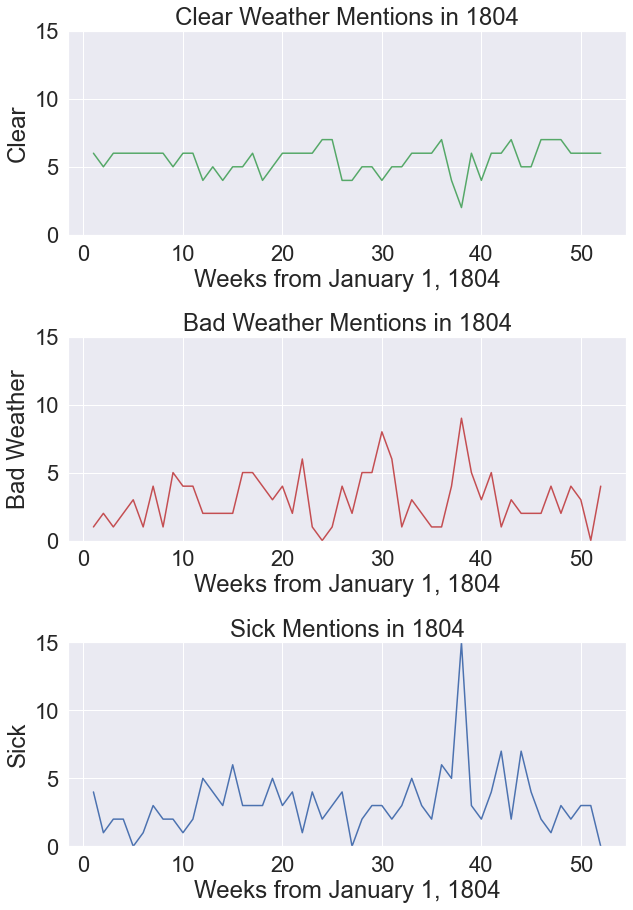

In [35]:
# set the font scale to 2
sns.set(font_scale=2)

# create the lists for plotting
mention_list = ['Clear', 'Bad Weather', 'Sick']
graph_list = ['Clear Weather', 'Bad Weather', 'Sick']
color_list = ['g', 'r', 'b']

# set 52 spaces between 1 and 52
bins = np.linspace(1, 52, 52)

for mention_count in range(len(mention_list)):
    # get current list
    mention = mention_list[mention_count]
    color = color_list[mention_count]
    
    # plot the measure for each plot by week
    plt.subplot(3, 1, mention_count + 1)
    plt.plot(weekly['Week'], weekly[mention], c=color, alpha=1)
    
    # label the x axis
    plt.xlabel('Weeks from January 1, 1804')
    
    # label the y axis
    plt.ylabel(mention)
    
    # set the domain of the y axis from 0 to 15
    plt.ylim(0, 15)
        
    # set the titles for the subplots
    plt.gca().title.set_text(graph_list[mention_count] + ' Mentions in 1804')
    
    # set the size of the plots to be 10 by 5
    plt.gcf().set_size_inches(10, 15)
    
    # adjust spacing for plots
    plt.subplots_adjust(wspace=.3, hspace=.5)

### Bar Graph

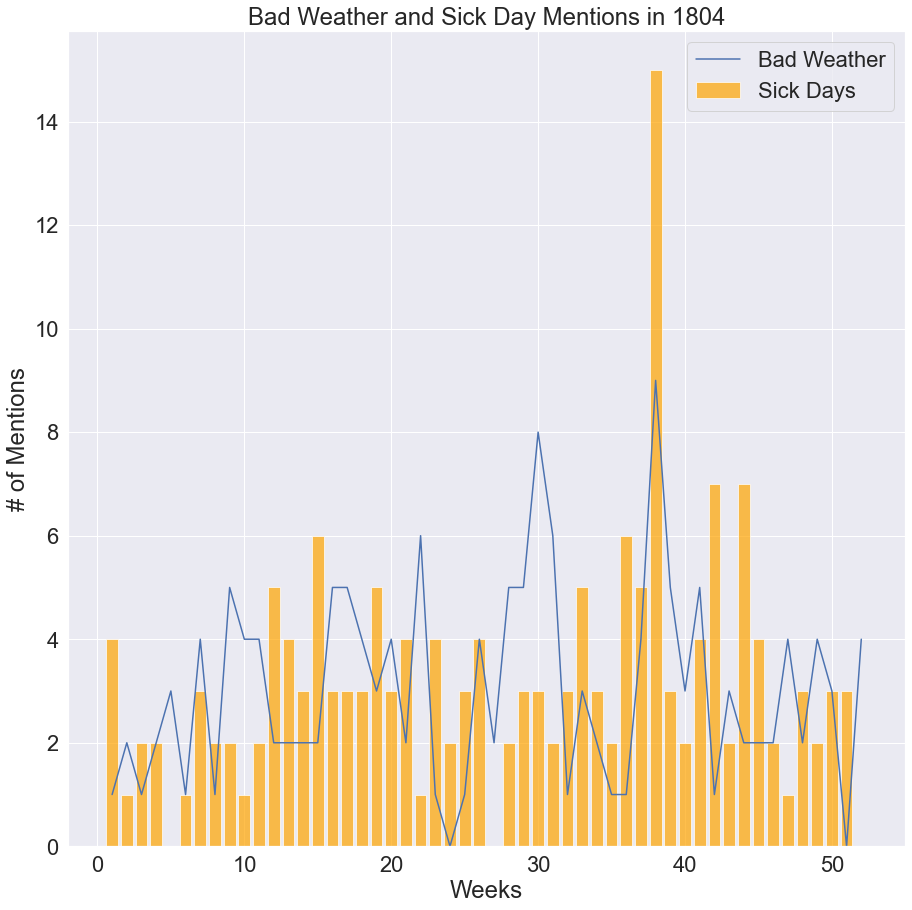

In [36]:
plt.plot(weekly['Week'],
         weekly['Bad Weather'],
         label='Bad Weather')

plt.bar(weekly['Week'],
        weekly['Sick'],
        label='Sick Days',
        color='orange',
        alpha=0.7)

plt.xlabel('Weeks')
plt.ylabel('# of Mentions')
plt.legend(loc='best')
plt.title('Bad Weather and Sick Day Mentions in 1804')
plt.gcf().set_size_inches(15, 15)

It's important to acknowledge that the sickness and weather data comes from Martha and isn't necessarily representative of the population at the time. The data does however still give valuable insight into the relative trends of this data. By overlaying a bar graph of sick days, and a line following mentions of bad weather, a trend emerges between the two. In general, in times of worse weather, Martha's diary shows increased mention of sickness. This makes sense as dry weather in the winter is often when diseases spread the most. Based on the graph this appears to be a moderate correlation. If someone wanted to continue the work on this data it could benefit by including more entries from Martha's diary or perhaps attempting to normalize the data. Additional data such as information from other people in the town or some kind of town census data would also be helpful to create a more accurate analysis.